In [1]:
import pandas as pd
import numpy as np
import os
from plotnine import *
os.chdir('C:\\Users\\Owner\\Script2_iGA')

In [2]:
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
base = importr('base')
utils = importr('utils')
Rmpfr = importr('Rmpfr')

In [3]:
import rpy2.robjects.packages as rpackages
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

rpy2.rinterface.NULL

In [4]:
M1146= pd.read_csv("TPM_M1146-ACT Data.csv", index_col= 'Locus_tag')
M1146_ACT= pd.read_csv("TPM_M1146+ACT Data.csv", index_col= 'Locus_tag')
dfsoxr = pd.read_csv("SoxR regulon.csv")
dfglnr = pd.read_csv("GlnR regulon.csv")
dfpho = pd.read_csv("Pho regulon.csv")

In [5]:
df = M1146.copy()
M1146=M1146.replace(0, float('NaN'))
M1146=M1146.replace(float('NaN'),np.min(M1146.min(axis=1))/2)
df1 = M1146_ACT.copy()
M1146_ACT=M1146_ACT.replace(0, float('NaN'))
M1146_ACT=M1146_ACT.replace(float('NaN'),np.min(M1146_ACT.min(axis=1))/2)

In [6]:
df_ratios = M1146_ACT/M1146

In [7]:
df_ratios

,18h,20h,22h,26h,30h,32h,34h,38h,44h,50h
Locus_tag,,,,,,,,,,
SCO3998,0.914317,0.475293,0.665108,0.753329,0.841881,1.077995,1.063045,1.078273,0.931359,1.550034
SCO3999,0.972016,1.370905,1.069973,1.109760,1.127758,0.832917,0.836905,0.907585,0.586653,1.039672
SCO4000,0.655843,2.816036,1.348563,1.059883,2.120970,1.077075,1.074852,0.442724,1.221620,0.718100
SCO4001,0.871974,3.148485,2.163320,1.854795,1.749800,2.019515,0.486447,1.296550,0.992566,0.550858
SCO4002,1.609798,0.880011,0.813060,0.968710,1.365325,2.192617,0.947577,0.865638,0.975769,0.546685
...,...,...,...,...,...,...,...,...,...,...
SCO3595,1.197029,1.098681,1.423047,0.983396,1.655216,0.926601,1.212653,0.703174,0.787372,0.663285
SCO2292,0.770501,1.642688,1.829550,1.002592,1.120041,0.963153,0.760074,0.593852,0.523551,0.625975
SCO5056,1.001916,1.140644,1.319210,1.388691,1.366637,1.070519,1.031858,1.022434,0.722193,0.896920


In [8]:
df_log2_FC = df_ratios.apply(np.log2)

In [9]:
df_log2_FC

,18h,20h,22h,26h,30h,32h,34h,38h,44h,50h
Locus_tag,,,,,,,,,,
SCO3998,-0.129233,-1.073111,-0.588340,-0.408647,-0.248312,0.108350,0.088202,0.108722,-0.102591,0.632300
SCO3999,-0.040948,0.455129,0.097575,0.150247,0.173458,-0.263755,-0.256864,-0.139895,-0.769419,0.056128
SCO4000,-0.608577,1.493666,0.431423,0.083905,1.084724,0.107119,0.104138,-1.175519,0.288795,-0.477743
SCO4001,-0.197643,1.654658,1.113247,0.891260,0.807190,1.014009,-1.039645,0.374678,-0.010765,-0.860247
SCO4002,0.686879,-0.184406,-0.298567,-0.045863,0.449244,1.132654,-0.077685,-0.208165,-0.035389,-0.871218
...,...,...,...,...,...,...,...,...,...,...
SCO3595,0.259458,0.135772,0.508984,-0.024155,0.727020,-0.109980,0.278167,-0.508046,-0.344883,-0.592299
SCO2292,-0.376130,0.716058,0.871489,0.003734,0.163552,-0.054162,-0.395789,-0.751825,-0.933597,-0.675822
SCO5056,0.002761,0.189849,0.399674,0.473726,0.450630,0.098310,0.045244,0.032007,-0.469544,-0.156949


In [10]:
soxr_regulon = df_log2_FC.loc[dfsoxr["Locus tag"]]

In [11]:
soxr_regulon

,18h,20h,22h,26h,30h,32h,34h,38h,44h,50h
Locus_tag,,,,,,,,,,
SCO0319,-0.976086,2.348327,1.746465,0.083905,0.495246,1.724503,-0.777218,-0.178369,0.376258,-0.610727
SCO0320,4.959898,7.078002,8.460710,5.498942,5.617405,5.899095,4.365024,3.889852,4.240080,4.665215
SCO0321,3.577319,3.885983,4.526222,2.798150,3.066881,4.050584,2.687627,3.158354,3.342206,3.055135
SCO1178,3.889509,5.045695,5.437598,3.664236,4.292466,4.325076,3.566143,3.586209,3.394180,3.927062
SCO1697,-0.352198,-0.220126,-0.345160,-0.419333,0.105679,-0.046846,0.120335,-0.189648,-0.515654,0.529879
SCO1734,0.442954,0.301021,2.113247,-0.215656,0.357743,0.107119,-0.796326,-0.415530,-0.595728,-0.116395
SCO1909,3.203455,4.357604,5.493739,4.628225,5.009042,4.578213,3.704613,4.079273,3.807448,3.956446
SCO2476,0.686879,2.828268,2.617836,2.260782,1.515009,1.876956,0.942628,0.281568,0.458720,0.239289
SCO2477,2.393148,3.223853,4.586663,2.346939,3.237178,2.916454,1.620422,1.499929,1.520648,1.988575


In [12]:
df1 = soxr_regulon.stack().rename_axis(('Locus_tag', 'Time')).reset_index(name='Value')
df1

,Locus_tag,Time,Value
0,SCO0319,18h,-0.976086
1,SCO0319,20h,2.348327
2,SCO0319,22h,1.746465
3,SCO0319,26h,0.083905
4,SCO0319,30h,0.495246
...,...,...,...
145,SCO7008,32h,2.417906
146,SCO7008,34h,2.443747
147,SCO7008,38h,2.177295
148,SCO7008,44h,2.180812


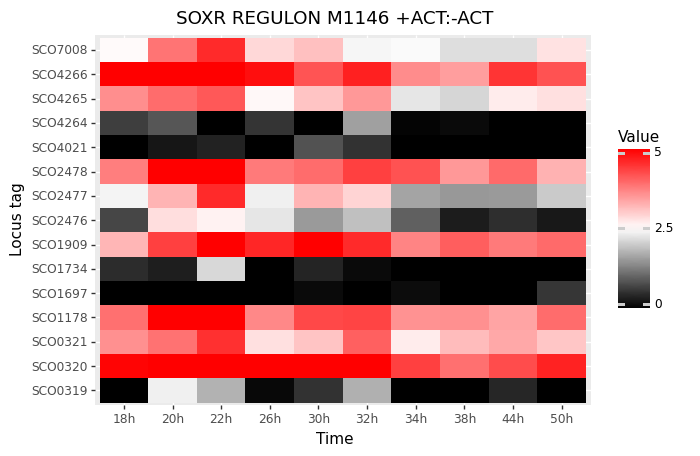

<ggplot: (-9223371850493234180)>

In [13]:
colors = ("black", "white", "red")
lims= (0,5)
b = (0,2.5,5)
a = ggplot(df1, aes(x='Time', y='Locus_tag')) + geom_tile(aes(fill = 'Value'))+ scale_fill_gradientn(limits= lims,colors= colors, breaks=(0,2.5,5),labels=("0", "2.5", "5"))
b = (a + ggtitle('SOXR REGULON M1146 +ACT:-ACT') + labs(y="Locus tag", x = "Time"))
b

In [14]:
b.save('Script2HeatMap1.png', width = 14, height = 14)

C:\Users\Owner\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 14 x 14 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Script2HeatMap1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [15]:
df2 = df_log2_FC.loc[:, df.columns]
df3 = df2.add_prefix('X')
metric = df3
metric.to_csv("metric.csv")

In [16]:
df4 = df3.reset_index()
df4['Group'] = df4['Locus_tag'].isin(dfsoxr['Locus tag']).astype(int)
df5 = df4[['Group']]
group_membership = df5
group_membership.to_csv("group_membership_soxr.csv")

In [17]:
import rpy2.robjects as robjects

In [18]:
r_source = robjects.r['source']
r_source('soxr_iGA.R')

print('r script finished running')

r script finished running


In [19]:
df18h = pd.read_csv("outputiGA18h.csv")
df20h = pd.read_csv("outputiGA20h.csv")
df22h = pd.read_csv("outputiGA22h.csv")
df26h = pd.read_csv("outputiGA26h.csv")
df30h = pd.read_csv("outputiGA30h.csv")
df32h = pd.read_csv("outputiGA32h.csv")
df34h = pd.read_csv("outputiGA34h.csv")
df38h = pd.read_csv("outputiGA38h.csv")
df44h = pd.read_csv("outputiGA44h.csv")
df50h = pd.read_csv("outputiGA50h.csv")
dfmerge = pd.concat([df18h,df20h,df22h,df26h,df30h,df32h,df34h,df38h,df44h,df50h])

In [20]:
soxr_iGA = dfmerge.set_index([pd.Index(['18h', '20h', '22h', '26h', '30h', '32h', '34h', '38h', '44h', '50h'])])
soxr_iGA

,minPC,list.position,N.var.selected,N.var.group
18h,6.204278e-14,108,9,15
20h,1.766811e-17,127,11,15
22h,1.246158e-16,56,9,15
26h,9.052094e-18,74,10,15
30h,3.395849e-17,49,9,15
32h,6.681572e-17,217,12,15
34h,2.842596e-16,61,9,15
38h,1.046611e-16,55,9,15
44h,3.438815e-13,130,9,15
50h,2.774052e-17,48,9,15


In [21]:
glnr_regulon = df_log2_FC.loc[dfglnr["Locus tag"]]

In [22]:
glnr_regulon

,18h,20h,22h,26h,30h,32h,34h,38h,44h,50h
Locus_tag,,,,,,,,,,
SCO4159,-0.478130,0.168087,0.336958,-0.009800,0.314547,0.610027,0.298356,0.451381,-0.331375,0.711047
SCO2198,-0.439885,-0.135390,-0.240401,-0.073487,0.370143,-0.074753,-0.026630,0.050432,-0.041135,0.259984
SCO5583,-0.954836,-0.250302,0.530349,0.208686,0.836709,0.250243,0.250979,-0.045258,-0.464828,0.026772
SCO5584,-0.368131,-0.238962,0.502355,0.759776,1.464429,0.724503,0.713146,0.217657,-0.147001,0.284021
SCO5585,-0.367269,-0.255269,0.691209,0.537815,0.549105,0.682300,-0.273533,-0.364213,-0.211490,-0.181713
...,...,...,...,...,...,...,...,...,...,...
SCO6148,0.311966,0.025294,-0.166076,-0.135259,0.189139,0.108646,0.306224,0.352583,-0.130747,0.124330
SCO1864,0.171732,-0.089769,0.089976,-0.198229,0.463959,0.126177,0.362846,0.423006,-0.895829,0.314718
SCO1865,0.022300,0.252017,0.587643,-0.111628,0.523851,0.186600,0.424652,0.286113,-0.705399,0.222924


In [23]:
df6 = glnr_regulon.stack().rename_axis(('Locus_tag', 'Time')).reset_index(name='Value')
df6

,Locus_tag,Time,Value
0,SCO4159,18h,-0.478130
1,SCO4159,20h,0.168087
2,SCO4159,22h,0.336958
3,SCO4159,26h,-0.009800
4,SCO4159,30h,0.314547
...,...,...,...
745,SCO1867,32h,0.118827
746,SCO1867,34h,0.269337
747,SCO1867,38h,0.487263
748,SCO1867,44h,-0.487194


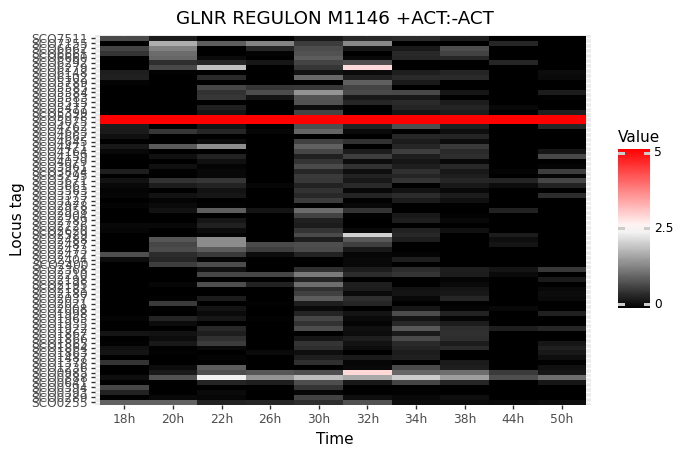

<ggplot: (-9223371850490839228)>

In [24]:
colors = ("black", "white", "red")
lims= (0,5)
b = (0,2.5,5)
a = ggplot(df6, aes(x='Time', y='Locus_tag')) + geom_tile(aes(fill = 'Value'))+ scale_fill_gradientn(limits= lims,colors= colors, breaks=(0,2.5,5),labels=("0", "2.5", "5"))
b = (a + ggtitle('GLNR REGULON M1146 +ACT:-ACT') + labs(y="Locus tag", x = "Time"))
b

In [25]:
b.save('Script2HeatMap2.png', width = 14, height = 14)

C:\Users\Owner\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 14 x 14 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Script2HeatMap2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [26]:
df7 = dfglnr.loc[dfglnr['Effect'] == 'Activated', ['Locus tag']]
df8 = df7.append({'Locus tag':'SCO4159'}, ignore_index=True)

In [27]:
df9 = df3.reset_index()
df9['Group'] = df9['Locus_tag'].isin(df8['Locus tag']).astype(int)
df10 = df9[['Group']]
group_membership = df10
group_membership.to_csv("group_membership_glnrA.csv")

In [28]:
r_source = robjects.r['source']
r_source('glnr_iGA.R')

print('r script finished running')

r script finished running


In [29]:
df18h = pd.read_csv("outputiGA18hglnrA.csv")
df20h = pd.read_csv("outputiGA20hglnrA.csv")
df22h = pd.read_csv("outputiGA22hglnrA.csv")
df26h = pd.read_csv("outputiGA26hglnrA.csv")
df30h = pd.read_csv("outputiGA30hglnrA.csv")
df32h = pd.read_csv("outputiGA32hglnrA.csv")
df34h = pd.read_csv("outputiGA34hglnrA.csv")
df38h = pd.read_csv("outputiGA38hglnrA.csv")
df44h = pd.read_csv("outputiGA44hglnrA.csv")
df50h = pd.read_csv("outputiGA50hglnrA.csv")
dfmerge = pd.concat([df18h,df20h,df22h,df26h,df30h,df32h,df34h,df38h,df44h,df50h])

In [30]:
glnr_activated_iGA = dfmerge.set_index([pd.Index(['18h', '20h', '22h', '26h', '30h', '32h', '34h', '38h', '44h', '50h'])])
glnr_activated_iGA

,minPC,list.position,N.var.selected,N.var.group
18h,0.002694,17,2,36
20h,0.002092,15,2,36
22h,0.000569,8,2,36
26h,0.001327,12,2,36
30h,0.001818,14,2,36
32h,0.000569,8,2,36
34h,0.000021,2312,23,36
38h,0.000205,5,2,36
44h,0.000569,8,2,36
50h,0.000730,9,2,36


In [31]:
df11 = dfglnr.loc[dfglnr['Effect'] == 'Repressed', ['Locus tag']]
df12 = df11.append({'Locus tag':'SCO4159'}, ignore_index=True)

In [32]:
df13 = df3.reset_index()
df13['Group'] = df13['Locus_tag'].isin(df12['Locus tag']).astype(int)
df14 = df13[['Group']]
group_membership = df14
group_membership.to_csv("group_membership_glnrR.csv")

In [33]:
r_source = robjects.r['source']
r_source('glnr_iGA.R')

print('r script finished running')

r script finished running


In [34]:
df18h = pd.read_csv("outputiGA18hglnrR.csv")
df20h = pd.read_csv("outputiGA20hglnrR.csv")
df22h = pd.read_csv("outputiGA22hglnrR.csv")
df26h = pd.read_csv("outputiGA26hglnrR.csv")
df30h = pd.read_csv("outputiGA30hglnrR.csv")
df32h = pd.read_csv("outputiGA32hglnrR.csv")
df34h = pd.read_csv("outputiGA34hglnrR.csv")
df38h = pd.read_csv("outputiGA38hglnrR.csv")
df44h = pd.read_csv("outputiGA44hglnrR.csv")
df50h = pd.read_csv("outputiGA50hglnrR.csv")
dfmerge = pd.concat([df18h,df20h,df22h,df26h,df30h,df32h,df34h,df38h,df44h,df50h])

In [35]:
glnr_repressed_iGA = dfmerge.set_index([pd.Index(['18h', '20h', '22h', '26h', '30h', '32h', '34h', '38h', '44h', '50h'])])
glnr_repressed_iGA

,minPC,list.position,N.var.selected,N.var.group
18h,0.185046,7427,34,34
20h,0.041973,4749,26,34
22h,0.004574,4677,28,34
26h,0.000005,3978,30,34
30h,0.313501,7270,33,34
32h,0.003067,5151,30,34
34h,0.782409,7748,34,34
38h,0.796290,7752,34,34
44h,0.007078,822,9,34
50h,0.638731,7702,34,34


In [36]:
pho_regulon = df_log2_FC.loc[dfpho['Locus tag']]

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [37]:
pho_regulon

,18h,20h,22h,26h,30h,32h,34h,38h,44h,50h
Locus_tag,,,,,,,,,,
SCO0033,-0.113812,0.948719,0.858433,-0.051025,-0.353965,-0.655842,-0.642582,-1.210285,-1.028279,-0.322185
SCO0034,0.686879,1.239620,1.305892,1.253830,0.062287,0.499436,-0.653176,-0.139895,-0.156616,-0.722116
SCO0216,4.048774,0.978760,-0.524288,-0.124754,0.323278,0.313058,-0.336749,0.184776,-0.406611,0.466987
SCO0217,3.965415,1.160277,-0.680955,-0.038892,0.577229,0.386465,-0.405182,0.082778,-0.907310,0.166015
SCO0255,0.959898,0.967597,0.335639,0.388759,0.466153,0.811380,0.118785,0.135739,0.111917,0.155601
...,...,...,...,...,...,...,...,...,...,...
SCO6025,0.206886,0.535486,0.305892,0.702814,0.117891,-0.137994,-0.285606,-0.461823,0.062791,-0.886719
SCO6534,-0.451681,0.048634,0.601348,0.467233,-0.442424,0.228681,-0.574932,-0.673874,-0.183728,-0.125855
SCO6535,-0.161118,0.086427,0.828570,0.026189,-0.297146,0.138337,-0.807032,-0.749520,-0.118423,-0.607235


In [38]:
df15 = pho_regulon.stack().rename_axis(('Locus_tag', 'Time')).reset_index(name='Value')
df15

,Locus_tag,Time,Value
0,SCO0033,18h,-0.113812
1,SCO0033,20h,0.948719
2,SCO0033,22h,0.858433
3,SCO0033,26h,-0.051025
4,SCO0033,30h,-0.353965
...,...,...,...
1025,SCO7697,32h,0.724503
1026,SCO7697,34h,0.173577
1027,SCO7697,38h,0.152886
1028,SCO7697,44h,-0.401314


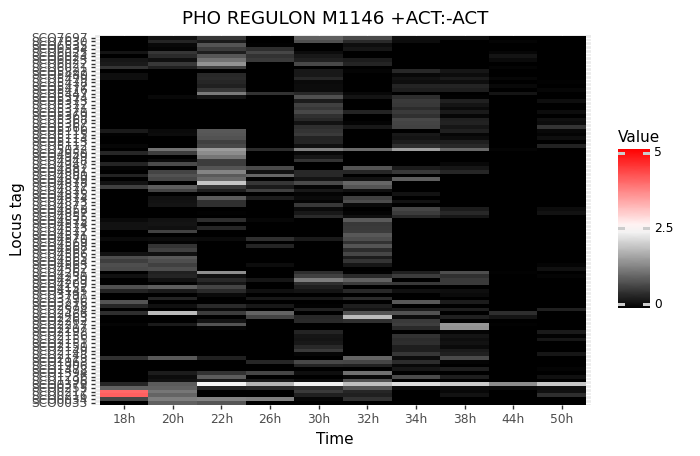

<ggplot: (-9223371850487448156)>

In [39]:
colors = ("black", "white", "red")
lims= (0,5)
b = (0,2.5,5)
a = ggplot(df15, aes(x='Time', y='Locus_tag')) + geom_tile(aes(fill = 'Value'))+ scale_fill_gradientn(limits= lims,colors= colors, breaks=(0,2.5,5),labels=("0", "2.5", "5"))
b = (a + ggtitle('PHO REGULON M1146 +ACT:-ACT') + labs(y="Locus tag", x = "Time"))
b

In [40]:
b.save('Script2HeatMap3.png', width = 14, height = 14)

C:\Users\Owner\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 14 x 14 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Script2HeatMap3.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [41]:
df16 = df_log2_FC.loc[:, df.columns]
df17 = df16.add_prefix('X')
metric = df17
metric.to_csv("metricpho.csv")

In [42]:
df18 = dfpho.loc[dfpho['Effect'] == 'Activated', ['Locus tag']]
df19 = df18.append({'Locus tag':'SCO4230'}, ignore_index=True)

In [43]:
df20 = df3.reset_index()
df20['Group'] = df20['Locus_tag'].isin(df19['Locus tag']).astype(int)
df21 = df20[['Group']]
group_membership = df21
group_membership.to_csv("group_membership_phoA.csv")

In [44]:
import rpy2.robjects as robjects

r_source = robjects.r['source']
r_source('pho_iGA.R')

print('r script finished running')

r script finished running


In [45]:
df18h = pd.read_csv("outputiGA18hphoA.csv")
df20h = pd.read_csv("outputiGA20hphoA.csv")
df22h = pd.read_csv("outputiGA22hphoA.csv")
df26h = pd.read_csv("outputiGA26hphoA.csv")
df30h = pd.read_csv("outputiGA30hphoA.csv")
df32h = pd.read_csv("outputiGA32hphoA.csv")
df34h = pd.read_csv("outputiGA34hphoA.csv")
df38h = pd.read_csv("outputiGA38hphoA.csv")
df44h = pd.read_csv("outputiGA44hphoA.csv")
df50h = pd.read_csv("outputiGA50hphoA.csv")
dfmerge = pd.concat([df18h,df20h,df22h,df26h,df30h,df32h,df34h,df38h,df44h,df50h])

In [46]:
pho_activated_iGA = dfmerge.set_index([pd.Index(['18h', '20h', '22h', '26h', '30h', '32h', '34h', '38h', '44h', '50h'])])
pho_activated_iGA

,minPC,list.position,N.var.selected,N.var.group
18h,0.054617,59,2,50
20h,0.013290,3701,32,50
22h,0.006439,3245,30,50
26h,0.206861,1594,13,50
30h,0.139039,7503,50,50
32h,0.156470,1373,12,50
34h,0.020054,163,4,50
38h,0.040975,298,5,50
44h,0.218621,7571,50,50
50h,0.280260,51,1,50


In [47]:
df22 = dfpho.loc[dfpho['Effect'] == 'Repressed', ['Locus tag']]
df23 = df22.append({'Locus tag':'SCO4230'}, ignore_index=True)

In [48]:
df24 = df3.reset_index()
df24['Group'] = df24['Locus_tag'].isin(df23['Locus tag']).astype(int)
df25 = df24[['Group']]
group_membership = df25
group_membership.to_csv("group_membership_phoR.csv")

In [49]:
import rpy2.robjects as robjects

r_source = robjects.r['source']
r_source('pho_iGA.R')

print('r script finished running')

r script finished running


In [50]:
df18h = pd.read_csv("outputiGA18hphoR.csv")
df20h = pd.read_csv("outputiGA20hphoR.csv")
df22h = pd.read_csv("outputiGA22hphoR.csv")
df26h = pd.read_csv("outputiGA26hphoR.csv")
df30h = pd.read_csv("outputiGA30hphoR.csv")
df32h = pd.read_csv("outputiGA32hphoR.csv")
df34h = pd.read_csv("outputiGA34hphoR.csv")
df38h = pd.read_csv("outputiGA38hphoR.csv")
df44h = pd.read_csv("outputiGA44hphoR.csv")
df50h = pd.read_csv("outputiGA50hphoR.csv")
dfmerge = pd.concat([df18h,df20h,df22h,df26h,df30h,df32h,df34h,df38h,df44h,df50h])

In [51]:
pho_repressed = dfmerge.set_index([pd.Index(['18h', '20h', '22h', '26h', '30h', '32h', '34h', '38h', '44h', '50h'])])
pho_repressed

,minPC,list.position,N.var.selected,N.var.group
18h,6.320923e-03,5440,43,50
20h,1.951010e-04,1396,20,50
22h,2.089157e-05,1896,26,50
26h,1.105319e-14,951,29,50
30h,4.995916e-05,759,15,50
32h,4.010372e-05,1963,26,50
34h,2.982042e-01,7618,50,50
38h,6.451105e-01,7192,46,50
44h,6.132111e-04,6136,48,50
50h,1.731774e-02,6915,49,50
